<a href="https://colab.research.google.com/github/alirezaghl/Allen-Neuropixels-Visual-Coding/blob/main/viscode_neuropixels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
from allensdk.brain_observatory.ecephys.ecephys_session import EcephysSession
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.stimulus_analysis.drifting_gratings import DriftingGratings
from allensdk.brain_observatory.ecephys.stimulus_analysis.receptive_field_mapping import ReceptiveFieldMapping
from allensdk.brain_observatory.ecephys.stimulus_analysis.flashes import Flashes

In [4]:
!pip install allensdk

In [5]:
import os
import shutil
import numpy as np
import pandas as pd
from pathlib import Path

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [6]:
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot

In [7]:
output_dir = '/local1/ecephys_cache_dir' # must be updated to a valid directory in your filesystem
DOWNLOAD_COMPLETE_DATASET = True

In [8]:
manifest_path = os.path.join(output_dir, "manifest.json")

In [9]:
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [10]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))

sessions.head()

Total number of sessions: 58


published_at  specimen_id           session_type  \
id                                                                    
715093703  2019-10-03T00:00:00Z    699733581  brain_observatory_1.1   
719161530  2019-10-03T00:00:00Z    703279284  brain_observatory_1.1   
721123822  2019-10-03T00:00:00Z    707296982  brain_observatory_1.1   
732592105  2019-10-03T00:00:00Z    717038288  brain_observatory_1.1   
737581020  2019-10-03T00:00:00Z    718643567  brain_observatory_1.1   

           age_in_days sex                                    full_genotype  \
id                                                                            
715093703        118.0   M    Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
719161530        122.0   M    Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
721123822        125.0   M  Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
732592105        100.0   M                                            wt/wt   
737581020        108.0   M                                            wt/wt   

           unit_count  channel_count  probe_count  \
id                                                  
715093703         884           2219            6   
719161530         755           2214            6   
721123822         444           2229            6   
732592105         824           1847            5   
737581020         568           2218            6   

                                  ecephys_structure_acronyms  
id                                                            
715093703  [CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ...  
719161530  [TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N...  
721123822  [MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ...  
732592105       [grey, VISpm, nan, VISp, VISl, VISal, VISrl]  
737581020      [grey, VISmma, nan, VISpm, VISp, VISl, VISrl]

In [ ]:
session = cache.get_session_data(sessions.index.values[0])

In [ ]:
filtered_sessions = sessions[(sessions.sex == 'M') & \
                             (sessions.full_genotype.str.find('Sst') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISl' in acronyms for acronyms in
                               sessions.ecephys_structure_acronyms])]

filtered_sessions.head()

published_at  specimen_id           session_type  \
id                                                                    
715093703  2019-10-03T00:00:00Z    699733581  brain_observatory_1.1   
719161530  2019-10-03T00:00:00Z    703279284  brain_observatory_1.1   
756029989  2019-10-03T00:00:00Z    734865738  brain_observatory_1.1   

           age_in_days sex                                  full_genotype  \
id                                                                          
715093703        118.0   M  Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
719161530        122.0   M  Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
756029989         96.0   M  Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   

           unit_count  channel_count  probe_count  \
id                                                  
715093703         884           2219            6   
719161530         755           2214            6   
756029989         684           2214            6   

                                  ecephys_structure_acronyms  
id                                                            
715093703  [CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ...  
719161530  [TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N...  
756029989  [TH, DG, CA3, CA1, VISl, nan, PO, Eth, LP, VIS...

In [ ]:
# Reading in spikes

In [ ]:
units = session.units
units.head

<bound method NDFrame.head of            waveform_PT_ratio  waveform_amplitude  amplitude_cutoff  \
unit_id                                                              
950910352           0.476196          106.785900          0.057700   
950910364           0.953652           85.808775          0.065649   
950910371           0.615593           76.898055          0.015509   
950910392           0.616317          120.519555          0.025891   
950910435           0.174735           66.974895          0.010061   
...                      ...                 ...               ...   
950956911           2.181048           91.264680          0.082007   
950956870           0.496457          311.723490          0.000042   
950956845           0.557797          137.348250          0.012523   
950956952           1.704987          156.687960          0.001086   
950957053           0.797269          276.111810          0.008051   

           cluster_id  cumulative_drift   d_prime  firing_r

In [ ]:
units.head()

waveform_PT_ratio  waveform_amplitude  amplitude_cutoff  \
unit_id                                                              
950910352           0.476196          106.785900          0.057700   
950910364           0.953652           85.808775          0.065649   
950910371           0.615593           76.898055          0.015509   
950910392           0.616317          120.519555          0.025891   
950910435           0.174735           66.974895          0.010061   

           cluster_id  cumulative_drift   d_prime  firing_rate  \
unit_id                                                          
950910352           6            419.57  4.576155     4.532385   
950910364           7            231.42  5.602703    31.486161   
950910371           8            209.31  5.061817    17.328610   
950910392          11            179.71  4.219074    16.262414   
950910435          17             99.99  6.393051    62.326305   

           isi_violations  isolation_distance   L_ratio  ...  \
unit_id                                                  ...   
950910352        0.029797           69.455405  0.002020  ...   
950910364        0.005998          102.847616  0.000146  ...   
950910371        0.005242           76.907610  0.004522  ...   
950910392        0.096884           65.671206  0.007306  ...   
950910435        0.004243          294.002222  0.000136  ...   

           ecephys_structure_id  ecephys_structure_acronym  \
unit_id                                                      
950910352                 215.0                        APN   
950910364                 215.0                        APN   
950910371                 215.0                        APN   
950910392                 215.0                        APN   
950910435                 215.0                        APN   

           anterior_posterior_ccf_coordinate  dorsal_ventral_ccf_coordinate  \
unit_id                                                                       
950910352                             8157.0                         3521.0   
950910364                             8154.0                         3513.0   
950910371                             8146.0                         3487.0   
950910392                             8133.0                         3444.0   
950910435                             8110.0                         3367.0   

           left_right_ccf_coordinate  probe_description  \
unit_id                                                   
950910352                     6697.0             probeA   
950910364                     6698.0             probeA   
950910371                     6701.0             probeA   
950910392                     6707.0             probeA   
950910435                     6719.0             probeA   

                          location  probe_sampling_rate  \
unit_id                                                   
950910352  See electrode locations         29999.954846   
950910364  See electrode locations         29999.954846   
950910371  See electrode locations         29999.954846   
950910392  See electrode locations         29999.954846   
950910435  See electrode locations         29999.954846   

           probe_lfp_sampling_rate  probe_has_lfp_data  
unit_id                                                 
950910352              1249.998119                True  
950910364              1249.998119                True  
950910371              1249.998119                True  
950910392              1249.998119                True  
950910435              1249.998119                True  

[5 rows x 40 columns]

In [ ]:
V1_units = units[(units.ecephys_structure_acronym == 'VISp') &
                (units.isi_violations < 0.1)]

print('Total number of low-contamination V1 units: ' + str(len(V1_units)))

Total number of low-contamination V1 units: 41


In [ ]:
unit_ID = V1_units.index.values[0]
session.spike_times[unit_ID]

array([ 152.52197133,  163.77921115,  171.41771555, ..., 9578.06660673,
       9578.14107343, 9578.18400679])

In [ ]:
sessions = cache.get_session_table()

In [ ]:
len(sessions)

58

In [ ]:
sessions.head()

published_at  specimen_id           session_type  \
id                                                                    
715093703  2019-10-03T00:00:00Z    699733581  brain_observatory_1.1   
719161530  2019-10-03T00:00:00Z    703279284  brain_observatory_1.1   
721123822  2019-10-03T00:00:00Z    707296982  brain_observatory_1.1   
732592105  2019-10-03T00:00:00Z    717038288  brain_observatory_1.1   
737581020  2019-10-03T00:00:00Z    718643567  brain_observatory_1.1   

           age_in_days sex                                    full_genotype  \
id                                                                            
715093703        118.0   M    Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
719161530        122.0   M    Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
721123822        125.0   M  Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
732592105        100.0   M                                            wt/wt   
737581020        108.0   M                                            wt/wt   

           unit_count  channel_count  probe_count  \
id                                                  
715093703         884           2219            6   
719161530         755           2214            6   
721123822         444           2229            6   
732592105         824           1847            5   
737581020         568           2218            6   

                                  ecephys_structure_acronyms  
id                                                            
715093703  [CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ...  
719161530  [TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N...  
721123822  [MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ...  
732592105       [grey, VISpm, nan, VISp, VISl, VISal, VISrl]  
737581020      [grey, VISmma, nan, VISpm, VISp, VISl, VISrl]

In [ ]:
sessions['unit_count'].mean()

689.8275862068965

In [ ]:
sessions['unit_count'].max()

1005

Text(0, 0.5, '# Sessions')

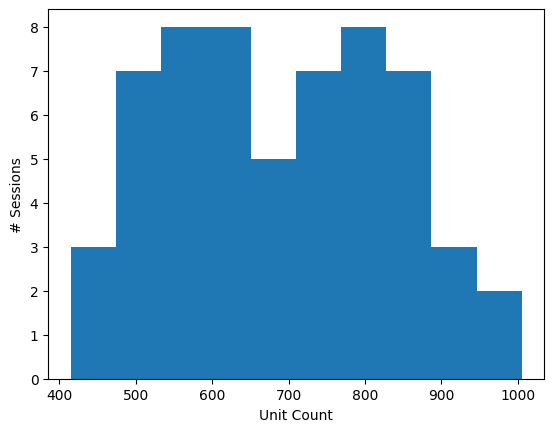

In [ ]:
plt.hist(sessions['unit_count'])
plt.xlabel('Unit Count')
plt.ylabel('# Sessions')

In [ ]:
sessions['session_type'].value_counts()

brain_observatory_1.1      32
functional_connectivity    26
Name: session_type, dtype: int64

In [ ]:
sessions.iter

In [ ]:
# Number of structures that data has been recorded from
structures = []
for index,row in sessions.iterrows():
    structures.extend(row['ecephys_structure_acronyms'])

print(set(structures))


{'Eth', 'VISrl', 'RPF', 'OP', 'LD', 'MGm', 'LP', 'LGv', 'PF', 'PRE', 'VISpm', 'IntG', 'PO', 'MB', 'POL', 'VPL', 'MGd', 'POST', 'RT', 'VISp', 'COAa', 'VISli', 'VISmmp', 'MGv', 'VL', 'MRN', 'SCsg', 'BMAa', 'VISmma', 'VIS', 'HPF', 'SCig', 'ZI', 'PP', 'VISam', 'NOT', 'PPT', nan, 'ProS', 'PoT', 'SUB', 'SCop', 'CA3', 'grey', 'SGN', 'OLF', 'VISl', 'LT', 'CP', 'APN', 'VISal', 'LGd', 'DG', 'TH', 'VPM', 'CA2', 'CA1', 'COApm', 'SCiw', 'IGL', 'PIL', 'SCzo'}


In [11]:
session_id = 750749662
session = cache.get_session_data(session_id)

Downloading:   0%|          | 0.00/2.82G [00:00<?, ?B/s]

In [ ]:
session.units.head()

waveform_PT_ratio  waveform_amplitude  amplitude_cutoff  \
unit_id                                                              
951851052           0.562802          172.518840          0.002892   
951851063           0.654514          141.937380          0.001844   
951851101           0.399403          150.047820          0.002267   
951851125           0.513707          209.994135          0.000712   
951851152           0.589894          179.716485          0.054723   

           cluster_id  cumulative_drift   d_prime  firing_rate  \
unit_id                                                          
951851052           4            390.69  5.602064     9.216453   
951851063           5            493.04  5.614530    43.965753   
951851101           9            293.25  6.036566    40.149059   
951851125          12            169.10  5.743368    36.786487   
951851152          15            204.77  4.307685    30.350855   

           isi_violations  isolation_distance   L_ratio  ...  \
unit_id                                                  ...   
951851052        0.111477           69.462814  0.002254  ...   
951851063        0.009307          129.061027  0.001981  ...   
951851101        0.007072          118.832154  0.000019  ...   
951851125        0.023398          117.385050  0.000856  ...   
951851152        0.022162           93.632331  0.008495  ...   

           ecephys_structure_id  ecephys_structure_acronym  \
unit_id                                                      
951851052           560581551.0                        Eth   
951851063                1020.0                         PO   
951851101                1020.0                         PO   
951851125                1020.0                         PO   
951851152           560581551.0                        Eth   

           anterior_posterior_ccf_coordinate  dorsal_ventral_ccf_coordinate  \
unit_id                                                                       
951851052                             7641.0                         3626.0   
951851063                             7638.0                         3617.0   
951851101                             7633.0                         3600.0   
951851125                             7619.0                         3548.0   
951851152                             7616.0                         3539.0   

           left_right_ccf_coordinate  probe_description  \
unit_id                                                   
951851052                     7116.0             probeA   
951851063                     7119.0             probeA   
951851101                     7123.0             probeA   
951851125                     7137.0             probeA   
951851152                     7139.0             probeA   

                          location  probe_sampling_rate  \
unit_id                                                   
951851052  See electrode locations         29999.966623   
951851063  See electrode locations         29999.966623   
951851101  See electrode locations         29999.966623   
951851125  See electrode locations         29999.966623   
951851152  See electrode locations         29999.966623   

           probe_lfp_sampling_rate  probe_has_lfp_data  
unit_id                                                 
951851052              1249.998609                True  
951851063              1249.998609                True  
951851101              1249.998609                True  
951851125              1249.998609                True  
951851152              1249.998609                True  

[5 rows x 40 columns]

In [ ]:
session.units.columns

Index(['waveform_PT_ratio', 'waveform_amplitude', 'amplitude_cutoff',
       'cluster_id', 'cumulative_drift', 'd_prime', 'firing_rate',
       'isi_violations', 'isolation_distance', 'L_ratio', 'local_index',
       'max_drift', 'nn_hit_rate', 'nn_miss_rate', 'peak_channel_id',
       'presence_ratio', 'waveform_recovery_slope',
       'waveform_repolarization_slope', 'silhouette_score', 'snr',
       'waveform_spread', 'waveform_velocity_above', 'waveform_velocity_below',
       'waveform_duration', 'filtering', 'probe_channel_number',
       'probe_horizontal_position', 'probe_id', 'probe_vertical_position',
       'structure_acronym', 'ecephys_structure_id',
       'ecephys_structure_acronym', 'anterior_posterior_ccf_coordinate',
       'dorsal_ventral_ccf_coordinate', 'left_right_ccf_coordinate',
       'probe_description', 'location', 'probe_sampling_rate',
       'probe_lfp_sampling_rate', 'probe_has_lfp_data'],
      dtype='object')

In [ ]:
# Number of units in this session
session.units.shape[0]

761

In [ ]:
session.units['ecephys_structure_acronym'].unique()

array(['Eth', 'PO', 'LP', 'DG', 'CA1', 'VISam', 'LD', 'VISpm', 'VISp',
       'CA3', 'VISl', 'VPM', 'TH', 'LGd', 'VISal', 'VISrl'], dtype=object)

In [ ]:
session.units['ecephys_structure_acronym'].value_counts()

LP       142
CA1      113
LGd       82
VISam     64
VISpm     64
VPM       55
VISp      52
VISal     46
VISrl     41
PO        30
DG        26
VISl      20
TH        13
CA3       10
Eth        2
LD         1
Name: ecephys_structure_acronym, dtype: int64

In [ ]:
len(session.spike_times)

761

In [ ]:
# Generate raster plot of one of the random units of VPM

In [ ]:
VPM_units = session.units[session.units['ecephys_structure_acronym'] == 'VPM']

In [ ]:
VPM_units

waveform_PT_ratio  waveform_amplitude  amplitude_cutoff  \
unit_id                                                              
951862853           1.443205           56.657640          0.001744   
951863001           1.143950          202.253610          0.000158   
951862994           2.166024          113.929725          0.011290   
951862979           0.618947          153.541635          0.054355   
951862936           0.576736          131.284725          0.070003   
951862930           0.649228          163.705230          0.084462   
951862923           0.595103          260.695110          0.000235   
951863017           0.387213          202.645755          0.000117   
951863008           0.308201           88.018125          0.002297   
951863054           0.365551          253.775535          0.000391   
951863032           0.428805          217.348365          0.001756   
951863024           0.482590          237.534765          0.000847   
951863088           0.503862          300.367860          0.000128   
951863070           0.429676          260.771355          0.004080   
951863062           0.687155          259.382370          0.000311   
951863092           0.236675          237.237195          0.001458   
951863255           0.715027          170.626560          0.005844   
951863137           0.632261          123.290895          0.009482   
951863123           0.649325          197.324595          0.001172   
951863114           0.570446          267.536490          0.000626   
951863224           0.399849          168.790050          0.028097   
951863153           0.694054          207.734475          0.000448   
951863263           0.168543          112.975395          0.067991   
951863341           0.651525          113.698845          0.005163   
951863332           0.611634          159.062085          0.000154   
951863284           0.305910          200.063175          0.000486   
951867954           0.384441          160.768920          0.007475   
951863351           0.364483          147.135300          0.014113   
951863274           0.329658          142.115025          0.000082   
951863390           0.811043          120.110250          0.002348   
951863380           0.995331          323.948235          0.006849   
951863407           0.135885          112.506030          0.086927   
951863400           0.013901          116.408955          0.023611   
951867978           1.882733          155.677275          0.019229   
951863520           1.682218          146.964870          0.041176   
951863439           1.159186          165.104355          0.068847   
951863432           1.248438          235.099020          0.018527   
951863571           0.568001          209.971320          0.000248   
951863485           0.461464          253.372860          0.000268   
951863476           0.439450          252.417750          0.001341   
951863467           0.560618          308.462310          0.000286   
951863458           0.507959          166.517520          0.002130   
951863527           0.502711          356.181345          0.003468   
951863448           0.610888          171.445560          0.001786   
951863583           0.425143          108.763005          0.041460   
951863614           0.317608          158.694900          0.001697   
951863602           0.991003          205.623990          0.000383   
951863685           1.400894          117.456105          0.020788   
951863650           1.380300          138.155160          0.074645   
951863593           1.574339          113.390550          0.013282   
951863703           0.394137          100.462830          0.014896   
951863632           0.399774          101.212410          0.016377   
951863675           1.520347          105.657435          0.033059   
951863659           1.763362          115.519755          0.096368   
951863694           0.318803          192.865725          0.000322   

           cluster_i

(0.0, 100.0)

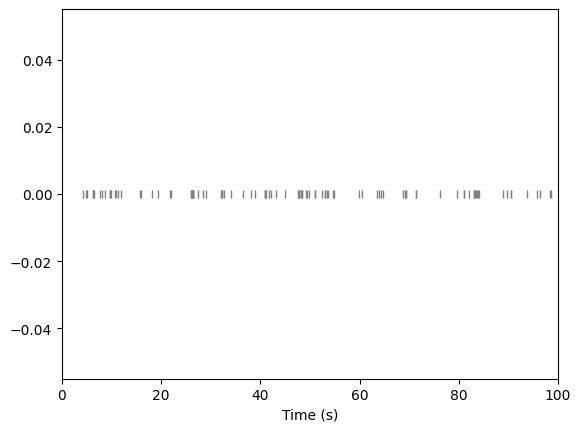

In [ ]:
# Generate raster plot for a random unit for the first 100 seconds
unit_id = VPM_units.index[0]
spikes = session.spike_times[unit_id]
plt.plot(spikes, np.zeros(len(spikes)), '|', color = 'gray')
plt.xlabel("Time (s)")
plt.xlim(0, 100)

In [ ]:
#plot activity in 1 second bins
binned_spikes, bin_edges = np.histogram(spikes, bins=np.arange(0, max(spikes)))


In [ ]:
binned_spikes

array([ 0,  0,  0, ..., 11,  9,  7])

In [ ]:
len(binned_spikes)

9907

In [ ]:
bin_edges

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.905e+03, 9.906e+03,
       9.907e+03])

In [ ]:
len(bin_edges)

9908

In [ ]:
len(spikes)

55424

In [ ]:
len(np.arange(0,max(spikes)))

9908

Text(0, 0.5, 'FR (Hz)')

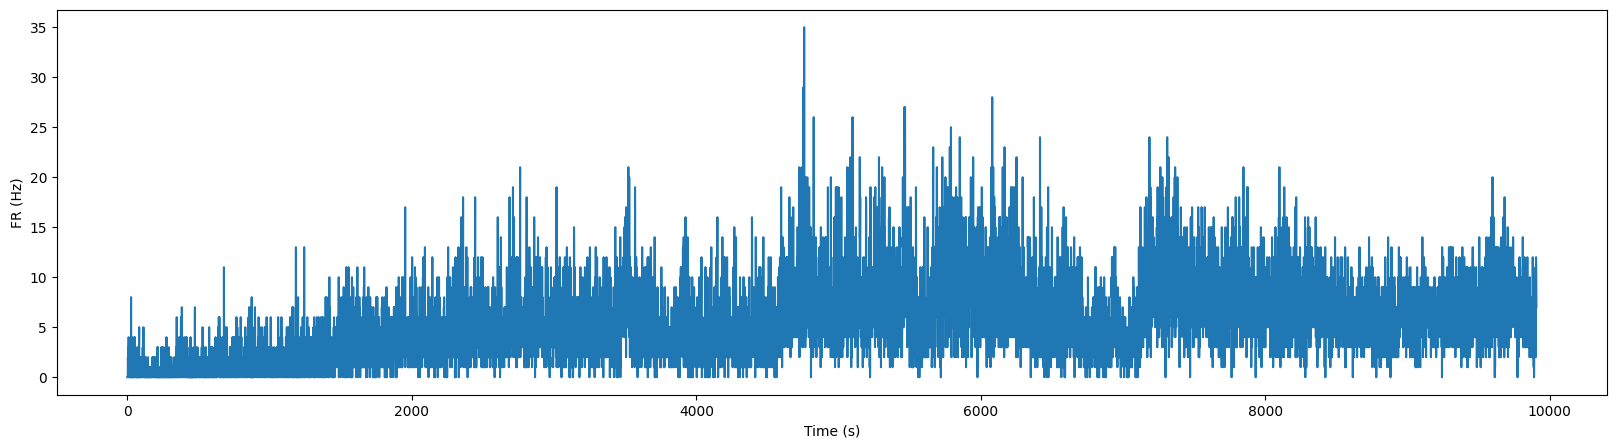

In [ ]:
binned_spikes, bin_edges = np.histogram(spikes, bins=np.arange(0, max(spikes)))

plt.figure(figsize=(20,5))
plt.plot(bin_edges[:-1], binned_spikes)
plt.xlabel("Time (s)")
plt.ylabel("FR (Hz)")

In [46]:
#Plotting the bin activity of all units in v1
numunits = VPM_units.shape[0]
numbins = len(binned_spikes)
vpm_binned = np.empty((numunits, numbins))

# compute binned spike rates for each unit:
for i in range(numunits):
    unit_id = VPM_units.index[i]
    spikes = session.spike_times[unit_id]
    vpm_binned[i] = np.histogram(spikes, bins=bin_edges)[0]

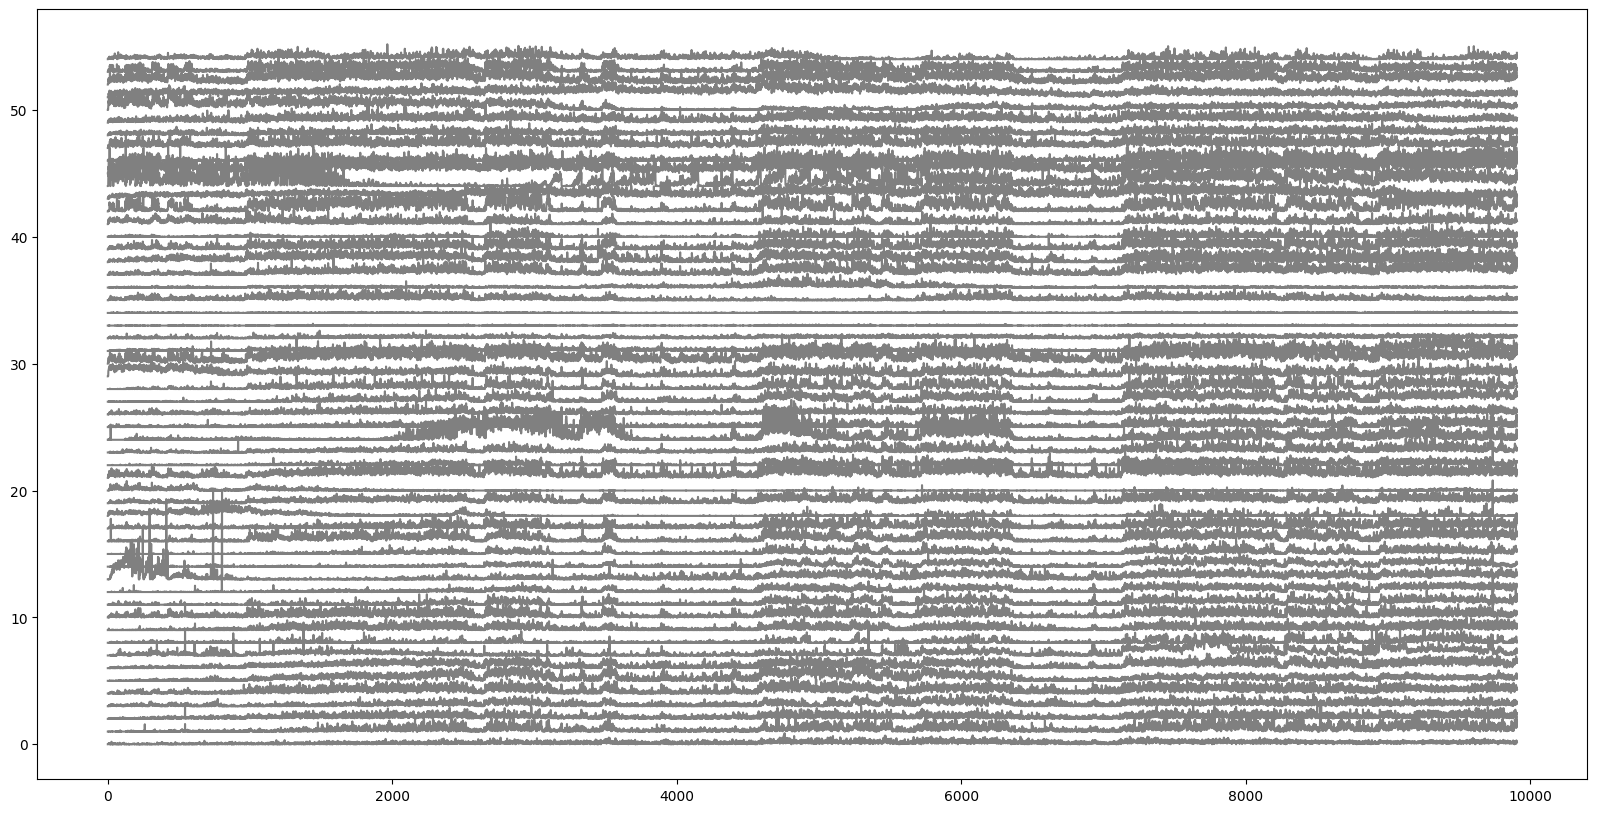

In [56]:
plt.figure(figsize=(20, 10))
for i in range(numunits):
    plt.plot(bin_edges[:-1], i + (vpm_binned[i,:] / 40.), color='gray')

In [57]:
session.stimulus_names

['spontaneous',
 'gabors',
 'flashes',
 'drifting_gratings',
 'natural_movie_three',
 'natural_movie_one',
 'static_gratings',
 'natural_scenes']

In [58]:
stimulus_epochs = session.get_stimulus_epochs()

In [59]:
stimulus_epochs

start_time    stop_time    duration        stimulus_name stimulus_block
0     24.266019    84.332759   60.066740          spontaneous           null
1     84.332759   996.327804  911.995045               gabors            0.0
2    996.327804  1285.319199  288.991395          spontaneous           null
3   1285.319199  1583.818517  298.499318              flashes            1.0
4   1583.818517  1585.570019    1.751502          spontaneous           null
5   1585.570019  2185.070792  599.500773    drifting_gratings            2.0
6   2185.070792  2216.096689   31.025897          spontaneous           null
7   2216.096689  2816.598309  600.501620  natural_movie_three            3.0
8   2816.598309  2846.623389   30.025080          spontaneous           null
9   2846.623389  3146.874199  300.250810    natural_movie_one            4.0
10  3146.874199  3176.899299   30.025100          spontaneous           null
11  3176.899299  3776.400072  599.500773    drifting_gratings            5.0
12  3776.400072  4077.651709  301.251637          spontaneous           null
13  4077.651709  4678.153509  600.501800  natural_movie_three            6.0
14  4678.153509  4708.178589   30.025080          spontaneous           null
15  4708.178589  5397.754942  689.576353    drifting_gratings            7.0
16  5397.754942  5398.755799    1.000857          spontaneous           null
17  5398.755799  5879.173969  480.418170      static_gratings            8.0
18  5879.173969  5909.199079   30.025110          spontaneous           null
19  5909.199079  6389.600609  480.401530       natural_scenes            9.0
20  6389.600609  6689.851499  300.250890          spontaneous           null
21  6689.851499  7170.252909  480.401410       natural_scenes           10.0
22  7170.252909  7200.277989   30.025080          spontaneous           null
23  7200.277989  7680.679329  480.401340      static_gratings           11.0
24  7680.679329  7710.704429   30.025100          spontaneous           null
25  7710.704429  8010.955279  300.250850    natural_movie_one           12.0
26  8010.955279  8040.980339   30.025060          spontaneous           null
27  8040.980339  8568.921400  527.941062       natural_scenes           13.0
28  8568.921400  8611.456939   42.535538          spontaneous           null
29  8611.456939  9151.908429  540.451490      static_gratings           14.0

In [60]:
for c, stim_name in enumerate(session.stimulus_names):
    stim = stimulus_epochs[stimulus_epochs.stimulus_name==stim_name]

In [65]:
stim

start_time    stop_time    duration   stimulus_name stimulus_block
19  5909.199079  6389.600609  480.401530  natural_scenes            9.0
21  6689.851499  7170.252909  480.401410  natural_scenes           10.0
27  8040.980339  8568.921400  527.941062  natural_scenes           13.0

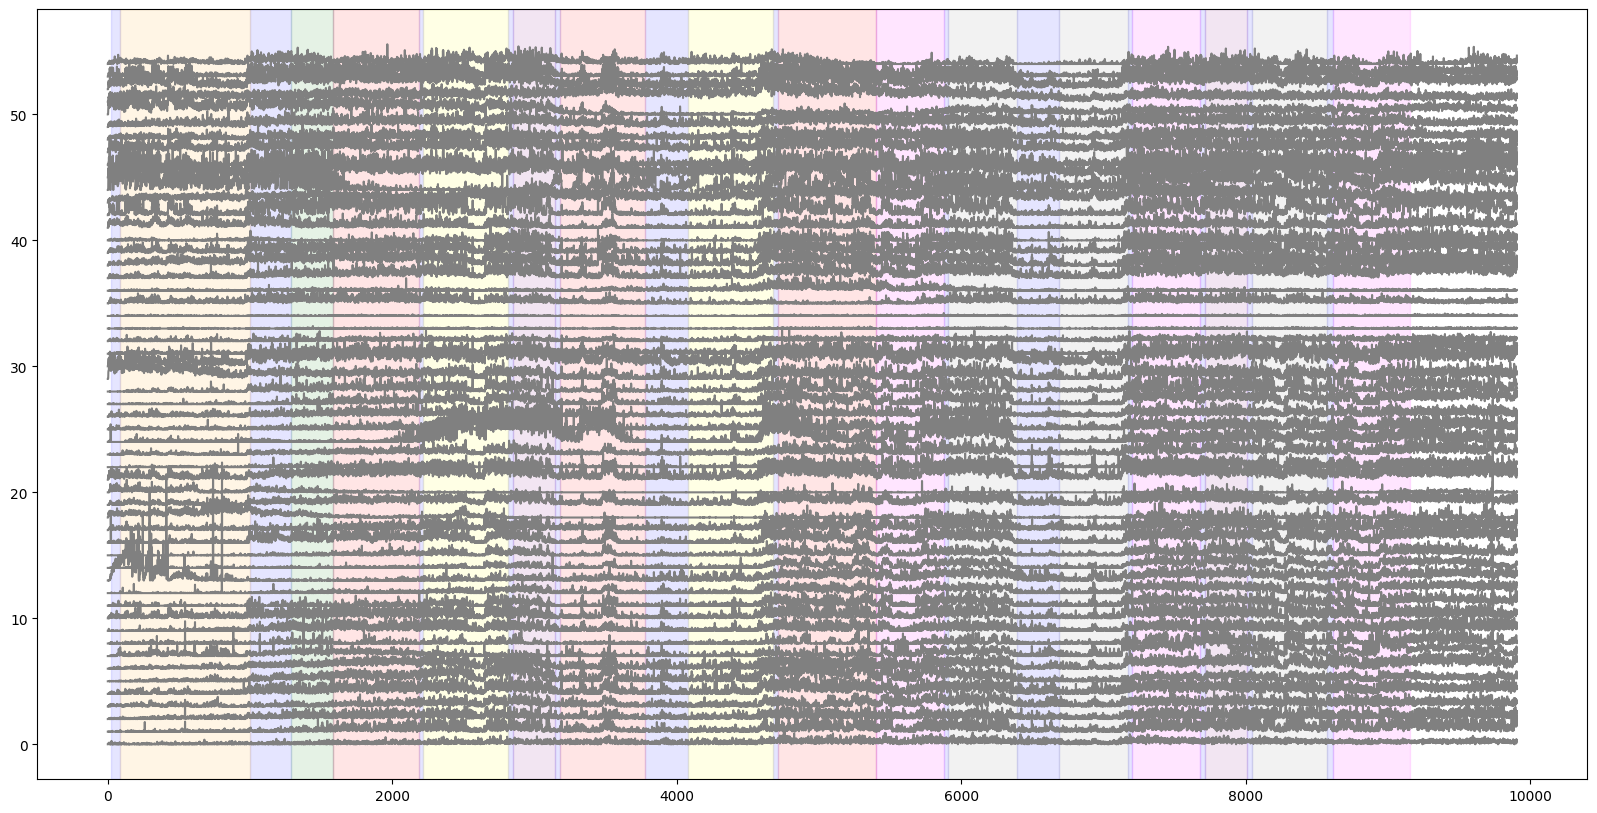

In [63]:
#shading each stimulus epoch with a unique color
plt.figure(figsize=(20, 10))
for i in range(numunits):
    plt.plot(bin_edges[:-1], i + (vpm_binned[i,:] / 30.), color='gray')

colors = ['blue','orange','green','red','yellow','purple','magenta','gray','lightblue']
for c, stim_name in enumerate(session.stimulus_names):
    stim = stimulus_epochs[stimulus_epochs.stimulus_name==stim_name]
    for j in range(len(stim)):
        plt.axvspan(
            xmin=stim["start_time"].iloc[j],
            xmax=stim["stop_time"].iloc[j],
            color=colors[c],
            alpha=0.1
        )

In [ ]:
# waveforms

In [ ]:
waveforms = session.mean_waveforms

In [ ]:
type(waveforms)

dict

In [ ]:
# get the waveform of a random unit

In [68]:
unit_r = session.units.index.values[700]
wf = session.mean_waveforms[unit_r]

In [69]:
wf.shape

(371, 82)

Text(0, 0.5, 'Channel #')

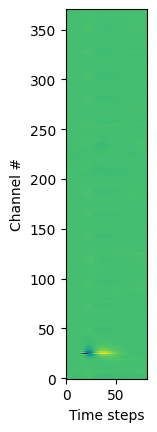

In [70]:
plt.imshow(wf, origin = 'lower')
plt.xlabel('Time steps')
plt.ylabel('Channel #')

In [ ]:
# Get information about where each channel is located

In [ ]:
structure_acronyms, intervals = session.channel_structure_intervals(wf.channel_id.values)
print(structure_acronyms)
print(intervals)

['LGd' 'CA3' 'DG' 'CA1' 'VISrl' nan]
[  0  35  77 124 193 281 371]


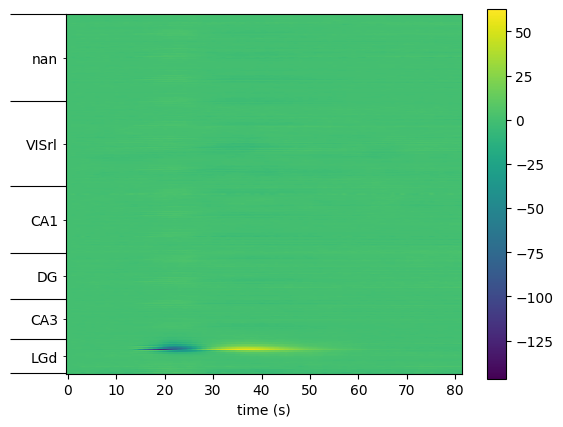

In [ ]:
fig, ax = plt.subplots()
plt.imshow(wf, aspect=.2, origin='lower')
plt.colorbar(ax=ax)

ax.set_xlabel("time (s)")
ax.set_yticks(intervals)
# construct a list of midpoints by averaging adjacent endpoints
interval_midpoints = [ (aa + bb) / 2 for aa, bb in zip(intervals[:-1], intervals[1:])]
ax.set_yticks(interval_midpoints, minor=True)
ax.set_yticklabels(structure_acronyms, minor=True)
plt.tick_params("y", which="major", labelleft=False, length=40)

plt.show()

plot the mean waveform on each unit's peak channel

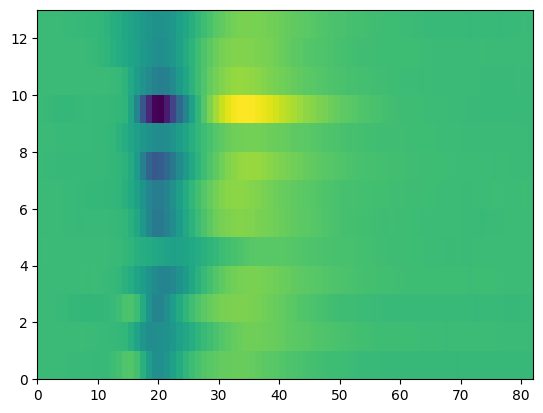

In [71]:
fig, ax = plt.subplots()

th_unit_ids = session.units[session.units.ecephys_structure_acronym=="TH"].index.values

peak_waveforms = []

for unit_id in th_unit_ids:

    peak_ch = session.units.loc[unit_id, "peak_channel_id"]
    unit_mean_waveforms = session.mean_waveforms[unit_id]

    peak_waveforms.append(unit_mean_waveforms.loc[{"channel_id": peak_ch}])


time_domain = unit_mean_waveforms["time"]

peak_waveforms = np.array(peak_waveforms)
plt.pcolormesh(peak_waveforms)

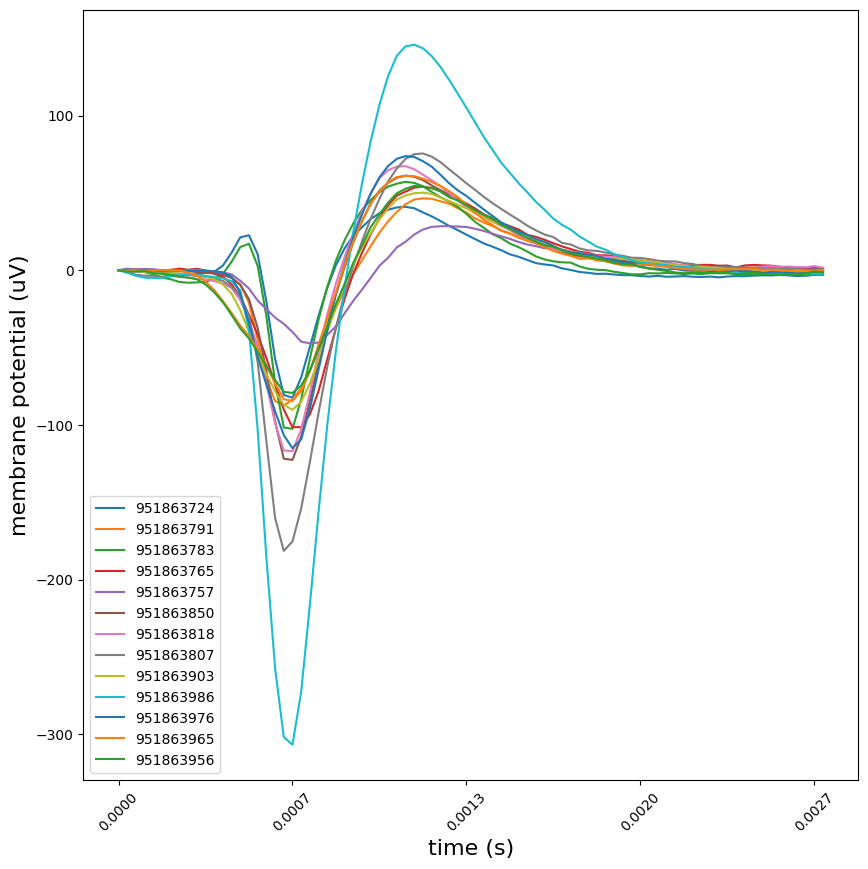

In [85]:
for unit_id in th_unit_ids:
  waveforms = {u: session.mean_waveforms[u] for u in th_unit_ids}
  peak_channels = {u: session.units.loc[u, 'peak_channel_id'] for u in th_unit_ids}

plot_mean_waveforms(waveforms, th_unit_ids, peak_channels)
plt.show()

In [ ]:
session.units[session.units.ecephys_structure_acronym=="VISp"].index.values

In [36]:
vis_areas = ['VISp','VISl','VISal','VISrl','VISam','VISpm']

Make raster plots for 10 units in each of the 2 hippocampal areas ('CA1', 'CA2')

In [37]:
hippocampus_areas = ['CA1', 'CA3']

In [38]:
hippocampus_session_list = []
for session_id in sessions.index:
    session_areas = sessions['ecephys_structure_acronyms'].loc[session_id]
    hip_areas_in_session = [area for area in hippocampus_areas if area in session_areas]
    if len(hip_areas_in_session)==2:
        hippocampus_session_list.append(session_id)
print(hippocampus_session_list)

[715093703, 719161530, 721123822, 743475441, 744228101, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 759883607, 760345702, 761418226, 762602078, 763673393, 766640955, 767871931, 768515987, 771160300, 771990200, 773418906, 774875821, 778240327, 778998620, 779839471, 781842082, 786091066, 787025148, 789848216, 791319847, 793224716, 794812542, 797828357, 798911424, 799864342, 816200189, 819186360, 819701982, 821695405, 829720705, 835479236, 839068429, 839557629, 840012044, 847657808]


In [40]:
session_id = hippocampus_session_list[0]
session = cache.get_session_data(session_id)

Downloading:   0%|          | 0.00/2.86G [00:00<?, ?B/s]

In [41]:
session.units.head()

waveform_PT_ratio  waveform_amplitude  amplitude_cutoff  \
unit_id                                                              
950910352           0.476196          106.785900          0.057700   
950910364           0.953652           85.808775          0.065649   
950910371           0.615593           76.898055          0.015509   
950910392           0.616317          120.519555          0.025891   
950910435           0.174735           66.974895          0.010061   

           cluster_id  cumulative_drift   d_prime  firing_rate  \
unit_id                                                          
950910352           6            419.57  4.576155     4.532385   
950910364           7            231.42  5.602703    31.486161   
950910371           8            209.31  5.061817    17.328610   
950910392          11            179.71  4.219074    16.262414   
950910435          17             99.99  6.393051    62.326305   

           isi_violations  isolation_distance   L_ratio  ...  \
unit_id                                                  ...   
950910352        0.029797           69.455405  0.002020  ...   
950910364        0.005998          102.847616  0.000146  ...   
950910371        0.005242           76.907610  0.004522  ...   
950910392        0.096884           65.671206  0.007306  ...   
950910435        0.004243          294.002222  0.000136  ...   

           ecephys_structure_id  ecephys_structure_acronym  \
unit_id                                                      
950910352                 215.0                        APN   
950910364                 215.0                        APN   
950910371                 215.0                        APN   
950910392                 215.0                        APN   
950910435                 215.0                        APN   

           anterior_posterior_ccf_coordinate  dorsal_ventral_ccf_coordinate  \
unit_id                                                                       
950910352                             8157.0                         3521.0   
950910364                             8154.0                         3513.0   
950910371                             8146.0                         3487.0   
950910392                             8133.0                         3444.0   
950910435                             8110.0                         3367.0   

           left_right_ccf_coordinate  probe_description  \
unit_id                                                   
950910352                     6697.0             probeA   
950910364                     6698.0             probeA   
950910371                     6701.0             probeA   
950910392                     6707.0             probeA   
950910435                     6719.0             probeA   

                          location  probe_sampling_rate  \
unit_id                                                   
950910352  See electrode locations         29999.954846   
950910364  See electrode locations         29999.954846   
950910371  See electrode locations         29999.954846   
950910392  See electrode locations         29999.954846   
950910435  See electrode locations         29999.954846   

           probe_lfp_sampling_rate  probe_has_lfp_data  
unit_id                                                 
950910352              1249.998119                True  
950910364              1249.998119                True  
950910371              1249.998119                True  
950910392              1249.998119                True  
950910435              1249.998119                True  

[5 rows x 40 columns]

In [42]:
session.units['ecephys_structure_acronym'].value_counts()

CA1      145
LP       139
grey     117
LGd       82
PO        76
VISrl     76
VISp      60
VISpm     50
VISl      42
VISam     30
APN       26
DG        26
CA3       14
PoT        1
Name: ecephys_structure_acronym, dtype: int64

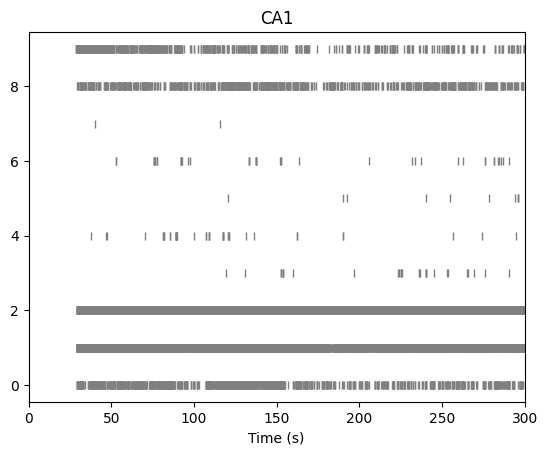

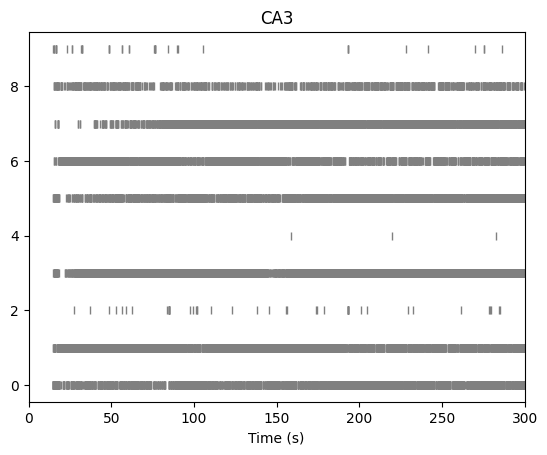

In [43]:
for i, unit_name in enumerate(hippocampus_areas):
  hippocampus_unit_list = session.units[session.units.ecephys_structure_acronym==unit_name].index

  for i, unit_id in enumerate(hippocampus_unit_list[:10]):
    spike_times =  session.spike_times[unit_id]
    plt.plot(spike_times, np.repeat(i, len(spike_times)), '|', color='gray')


  plt.title(unit_name)
  plt.xlabel("Time (s)")
  plt.xlim(0, 300)
  plt.show()


Inter Spike Interval with 1ms bins for a single unit

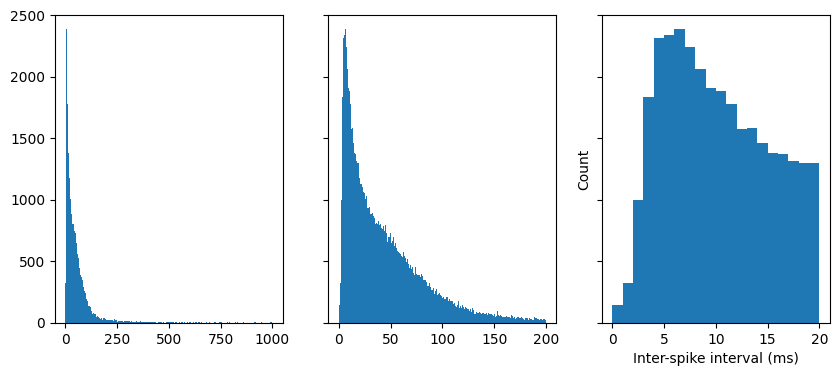

In [ ]:
unit_id = session.units.index.values[0]
unit_spikes = session.spike_times[unit_id]
isi = np.diff(unit_spikes) * 1000
fig, ax = plt.subplots(1,3, figsize=(10,4), sharey = True)
ax[0].hist(isi, bins=1000, range=(0,1000))
ax[1].hist(isi, bins=200,range=(0,200))
ax[2].hist(isi, bins=20,range=(0,20))
plt.ylabel('Count')
plt.xlabel('Inter-spike interval (ms)')
plt.show()


In [45]:
stim_table = session.get_stimulus_table('natural_scenes')
stim_ids = stim_table.index.values
stim_table

frame   start_time stimulus_block   stimulus_name  \
stimulus_presentation_id                                                      
51353                       5.0  5892.415053            9.0  natural_scenes   
51354                     114.0  5892.665249            9.0  natural_scenes   
51355                      13.0  5892.915445            9.0  natural_scenes   
51356                      70.0  5893.165641            9.0  natural_scenes   
51357                      26.0  5893.415837            9.0  natural_scenes   
...                         ...          ...            ...             ...   
68222                      24.0  8550.902302           13.0  natural_scenes   
68223                     107.0  8551.152520           13.0  natural_scenes   
68224                     100.0  8551.402739           13.0  natural_scenes   
68225                      76.0  8551.652957           13.0  natural_scenes   
68226                      77.0  8551.903166           13.0  natural_scenes   

                            stop_time  duration  stimulus_condition_id  
stimulus_presentation_id                                                
51353                     5892.665249  0.250196                   4908  
51354                     5892.915445  0.250196                   4909  
51355                     5893.165641  0.250196                   4910  
51356                     5893.415837  0.250196                   4911  
51357                     5893.666049  0.250211                   4912  
...                               ...       ...                    ...  
68222                     8551.152520  0.250219                   5006  
68223                     8551.402739  0.250219                   4969  
68224                     8551.652957  0.250219                   4924  
68225                     8551.903166  0.250209                   4967  
68226                     8552.153375  0.250209                   4962  

[5950 rows x 7 columns]

In [46]:
frames = np.unique(stim_table.frame)
frames = np.sort(frames)
frames

array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
       12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
       23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0,
       34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0,
       45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0,
       56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0,
       67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0,
       78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0,
       89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0,
       100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0,
       109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0],
      dtype=object)

In [49]:
stim_presentation_ids = stim_table[stim_table.frame==83].index.values

In [50]:
stim_presentation_ids

array([51650, 51750, 51798, 51833, 52059, 52306, 52326, 52355, 52520,
       52585, 52814, 52877, 52902, 53010, 53114, 53221, 53338, 53446,
       53472, 53528, 53608, 53699, 53909, 54120, 54331, 54332, 54459,
       54490, 54543, 54803, 54873, 55087, 55100, 55108, 66326, 66447,
       66552, 66580, 66699, 66757, 66950, 66951, 67048, 67119, 67126,
       67260, 67469, 67567, 67765, 68028])

In [53]:
duration = stim_table.duration.mean()

In [55]:
bin_width = 0.005
pre_time = -2 * duration
post_time = 2 * duration
bins = np.arange(pre_time, post_time+bin_width, bin_width)

In [56]:
bins

array([-5.00423571e-01, -4.95423571e-01, -4.90423571e-01, -4.85423571e-01,
       -4.80423571e-01, -4.75423571e-01, -4.70423571e-01, -4.65423571e-01,
       -4.60423571e-01, -4.55423571e-01, -4.50423571e-01, -4.45423571e-01,
       -4.40423571e-01, -4.35423571e-01, -4.30423571e-01, -4.25423571e-01,
       -4.20423571e-01, -4.15423571e-01, -4.10423571e-01, -4.05423571e-01,
       -4.00423571e-01, -3.95423571e-01, -3.90423571e-01, -3.85423571e-01,
       -3.80423571e-01, -3.75423571e-01, -3.70423571e-01, -3.65423571e-01,
       -3.60423571e-01, -3.55423571e-01, -3.50423571e-01, -3.45423571e-01,
       -3.40423571e-01, -3.35423571e-01, -3.30423571e-01, -3.25423571e-01,
       -3.20423571e-01, -3.15423571e-01, -3.10423571e-01, -3.05423571e-01,
       -3.00423571e-01, -2.95423571e-01, -2.90423571e-01, -2.85423571e-01,
       -2.80423571e-01, -2.75423571e-01, -2.70423571e-01, -2.65423571e-01,
       -2.60423571e-01, -2.55423571e-01, -2.50423571e-01, -2.45423571e-01,
       -2.40423571e-01, -

In [61]:
da = session.presentationwise_spike_counts(
    bin_edges = bins,
    stimulus_presentation_ids= stim_presentation_ids,
    unit_ids = None
)

In [69]:
mean_da = da.mean(dim="stimulus_presentation_id")
rates = mean_da/bin_width

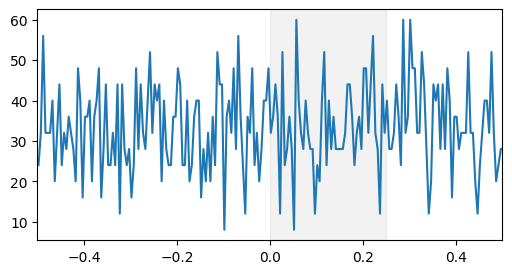

In [79]:
def plot_psth(unit_id, rates, ax=None, title=None):
    if not ax:
        fig,ax = plt.subplots(1,1,figsize=(6,3))

    rates.loc[{'unit_id':unit_id}].plot(ax=ax)
    ax.axvspan(0, duration, color='gray', alpha=0.1)
    ax.set_ylabel('Firing rate (spikes/second)')
    ax.set_xlabel('Time (s)')
    ax.set_xlim(pre_time,post_time)
    if ax:
        ax.set_title(title)
        ax.set_xlabel('')
        ax.set_ylabel('')


unit_id = session.units.index.values[10]
plot_psth(unit_id, rates)

In [80]:
spike_stats = session.conditionwise_spike_statistics(stimulus_presentation_ids=stim_ids, unit_ids= session.units.index.values)

In [83]:
spike_stats.head()

spike_count  stimulus_presentation_count  \
unit_id   stimulus_condition_id                                             
950910352 4908                           112                           50   
950910364 4908                           373                           50   
950910371 4908                           229                           50   
950910392 4908                           294                           50   
950910435 4908                           880                           50   

                                 spike_mean  spike_std  spike_sem  
unit_id   stimulus_condition_id                                    
950910352 4908                         2.24   2.853998   0.403616  
950910364 4908                         7.46   2.808224   0.397143  
950910371 4908                         4.58   1.959696   0.277143  
950910392 4908                         5.88   5.464692   0.772824  
950910435 4908                        17.60   4.977500   0.703925

In [82]:
spike_stats.shape

(105196, 5)

In [92]:
frames

array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
       12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
       23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0,
       34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0,
       45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0,
       56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0,
       67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0,
       78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0,
       89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0,
       100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0,
       109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0],
      dtype=object)

Text(0, 0.5, 'response mean')

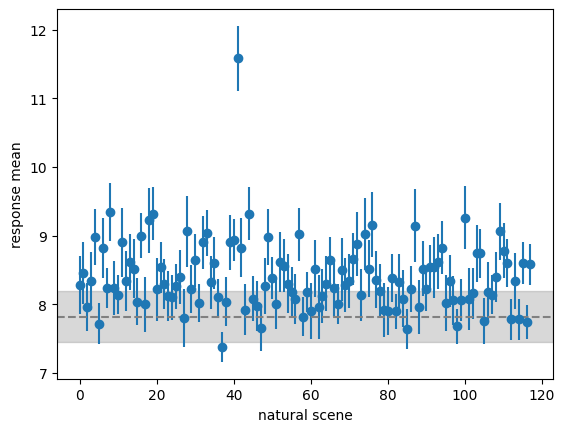

In [91]:
unit_id = session.units.index.values[10]
response_mean = np.empty((len(frames)))
response_sem = np.empty((len(frames)))
for i,frame in enumerate(frames):
    stim_id = stim_table[stim_table.frame==frame].stimulus_condition_id.iloc[0]
    response_mean[i] = spike_stats.loc[(unit_id, stim_id)].spike_mean
    response_sem[i] = spike_stats.loc[(unit_id, stim_id)].spike_sem
plt.errorbar(range(118), response_mean[1:], yerr=response_sem[1:], fmt='o')
plt.axhspan(response_mean[0]+response_sem[0], response_mean[0]-response_sem[0], color='gray', alpha=0.3)
plt.axhline(y=response_mean[0], color='gray', ls='--')
plt.xlabel('natural scene')
plt.ylabel('response mean')

Spike Histograms and psth for the units in V1 in response to natural scenes stimulus:

In [94]:
stim_table.head()

frame   start_time stimulus_block   stimulus_name  \
stimulus_presentation_id                                                      
51353                       5.0  5892.415053            9.0  natural_scenes   
51354                     114.0  5892.665249            9.0  natural_scenes   
51355                      13.0  5892.915445            9.0  natural_scenes   
51356                      70.0  5893.165641            9.0  natural_scenes   
51357                      26.0  5893.415837            9.0  natural_scenes   

                            stop_time  duration  stimulus_condition_id  
stimulus_presentation_id                                                
51353                     5892.665249  0.250196                   4908  
51354                     5892.915445  0.250196                   4909  
51355                     5893.165641  0.250196                   4910  
51356                     5893.415837  0.250196                   4911  
51357                     5893.666049  0.250211                   4912

In [189]:
# Specify time bins in ms
bin_width = 1/100
duration = stim_table.duration.mean()
pre_time = -2 * duration
post_time = 2 * duration
bins = np.arange(pre_time, post_time+bin_width, bin_width)

In [190]:
duration

0.25021178525718574

In [191]:
bins.shape

(102,)

In [192]:
stim_ids = stim_table[(stim_table.frame==70)].index
stim_ids.shape

(50,)

In [193]:
v1_units = session.units[session.units.structure_acronym=='VISp']

In [194]:
v1_units.head()

waveform_PT_ratio  waveform_amplitude  amplitude_cutoff  \
unit_id                                                              
950930145           7.031742           102.55557          0.082525   
950930105           0.601677            79.86069          0.095761   
950930276           0.517356            82.90425          0.013349   
950933698           0.476703           107.32878          0.000023   
950930237           0.567728           134.57301          0.001889   

           cluster_id  cumulative_drift   d_prime  firing_rate  \
unit_id                                                          
950930145         410            202.02  4.343827     9.910598   
950930105         408            145.08  5.052111    11.054619   
950930276         415            101.96  3.670607     8.772900   
950933698         601            152.21  4.428315     1.277709   
950930237         413             81.63  3.703712     3.280311   

           isi_violations  isolation_distance   L_ratio  ...  \
unit_id                                                  ...   
950930145        0.011634           78.408045  0.002632  ...   
950930105        0.011082          100.175018  0.006947  ...   
950930276        0.025294           75.644463  0.002472  ...   
950933698        0.025923           47.931608  0.004305  ...   
950930237        0.023598           50.545418  0.008739  ...   

           ecephys_structure_id  ecephys_structure_acronym  \
unit_id                                                      
950930145                 385.0                       VISp   
950930105                 385.0                       VISp   
950930276                 385.0                       VISp   
950933698                 385.0                       VISp   
950930237                 385.0                       VISp   

           anterior_posterior_ccf_coordinate  dorsal_ventral_ccf_coordinate  \
unit_id                                                                       
950930145                             8586.0                         1465.0   
950930105                             8584.0                         1477.0   
950930276                             8591.0                         1441.0   
950933698                             8589.0                         1453.0   
950930237                             8589.0                         1453.0   

           left_right_ccf_coordinate  probe_description  \
unit_id                                                   
950930145                     8212.0             probeC   
950930105                     8213.0             probeC   
950930276                     8210.0             probeC   
950933698                     8211.0             probeC   
950930237                     8211.0             probeC   

                          location  probe_sampling_rate  \
unit_id                                                   
950930145  See electrode locations          29999.98547   
950930105  See electrode locations          29999.98547   
950930276  See electrode locations          29999.98547   
950933698  See electrode locations          29999.98547   
950930237  See electrode locations          29999.98547   

           probe_lfp_sampling_rate  probe_has_lfp_data  
unit_id                                                 
950930145              1249.999395                True  
950930105              1249.999395                True  
950930276              1249.999395                True  
950933698              1249.999395                True  
950930237              1249.999395                True  

[5 rows x 40 columns]

In [217]:
histograms = session.presentationwise_spike_counts(
    bin_edges = bins,
    stimulus_presentation_ids=stim_ids,
    unit_ids=v1_units.index
)

In [218]:
histograms.shape

(50, 101, 60)

Text(0, 0.5, 'Trials')

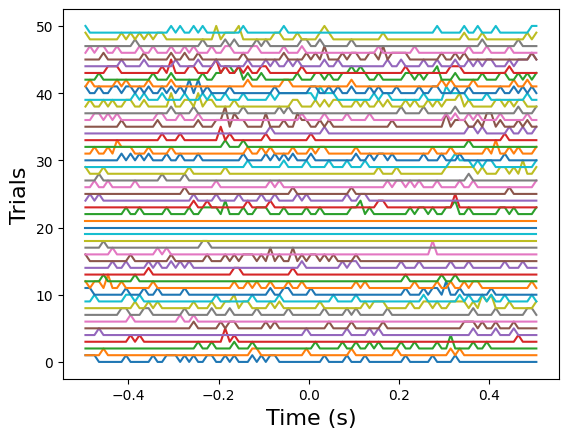

In [219]:
for i in range(50):
    plt.plot(histograms.time_relative_to_stimulus_onset, i+histograms[i,:,0])
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Trials", fontsize=16)

In [220]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

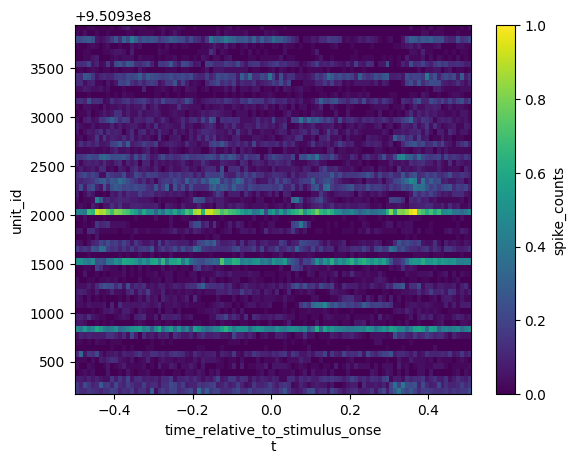

In [221]:
import xarray.plot as xrplot
xrplot.imshow(darray=mean_histograms, x="time_relative_to_stimulus_onset",
                                      y="unit_id")

In [168]:
v1_units.index.values[0]

array([950930145, 950930105, 950930276, 950933698, 950930237, 950930215,
       950930358, 950930340, 950930437, 950930423, 950930407, 950930392,
       950930375, 950930522, 950930454, 950933732, 950930866, 950930795,
       950930888, 950931118, 950931004, 950930985, 950934181, 950930964,
       950931043, 950931236, 950931181, 950931164, 950931272, 950931254,
       950931423, 950931363, 950933840, 950931458, 950931315, 950931565,
       950931533, 950931517, 950931656, 950931805, 950931617, 950931581,
       950931770, 950931751, 950931727, 950931853, 950931959, 950931899,
       950931878, 950933890, 950932102, 950932087, 950933907, 950932032,
       950933924, 950932445, 950932578, 950932563, 950932696, 950933960])

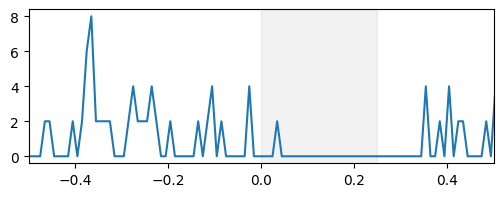

In [222]:
rates = mean_histograms / bin_width
plot_psth(v1_units.index.values[-1], rates)

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

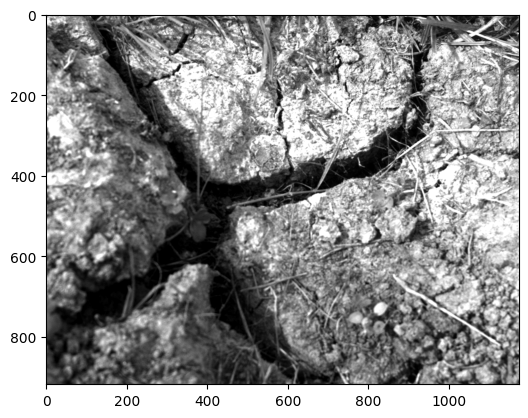

In [12]:
#Image
image_num = 70
image_template = cache.get_natural_scene_template(image_num)

plt.imshow(image_template, cmap='gray')

LFP

In [13]:
probe_id = session.probes.index[0]
lfp = session.get_lfp(probe_id)
lfp

Downloading:   0%|          | 0.00/2.52G [00:00<?, ?B/s]

<xarray.DataArray 'LFP' (time: 12370002, channel: 94)>
array([[ 5.8109999e-05,  4.7969999e-05,  5.2064999e-05, ...,
         8.3850000e-06,  1.5600000e-06, -3.3150000e-06],
       [ 4.6019999e-05,  4.2315001e-05,  3.3734999e-05, ...,
         1.6964999e-05,  1.1700000e-06,  9.5550004e-06],
       [ 5.3820000e-05,  5.7134999e-05,  5.3234999e-05, ...,
         1.7160000e-05, -1.1700000e-06,  1.1700000e-06],
       ...,
       [-8.5020001e-05, -5.1870000e-05, -1.5795000e-05, ...,
        -7.7999999e-07, -7.9949996e-06,  5.1089999e-05],
       [-8.0730002e-05, -5.8304999e-05, -1.1115000e-05, ...,
         7.4099999e-06, -6.0449997e-06,  3.7245001e-05],
       [-8.4824998e-05, -6.7080000e-05, -3.3734999e-05, ...,
         5.8500000e-06, -4.6800001e-06,  1.8720000e-05]], dtype=float32)
Coordinates:
  * time     (time) float64 3.757 3.758 3.759 3.759 ... 9.9e+03 9.9e+03 9.9e+03
  * channel  (channel) int64 850170410 850170418 ... 850171146 850171154

In [14]:
len(lfp.channel)

94

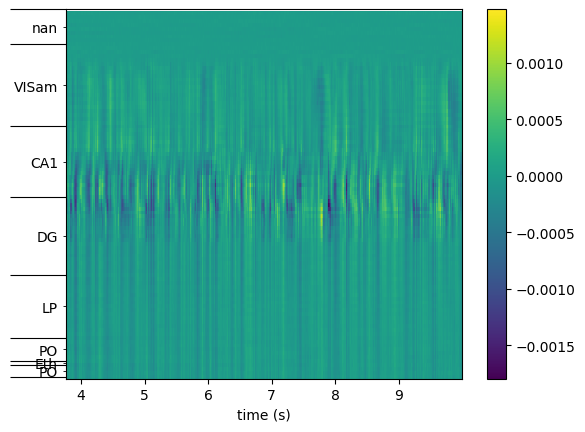

In [18]:
fig, ax = plt.subplots()
lfp_plot = lfp.loc[dict(time=slice(0,10))]
x, y = lfp_plot.time, range(len(lfp_plot.channel))
plt.pcolormesh(x, y, lfp_plot.values.T)
plt.colorbar(ax=ax)

ax.set_xlabel("time (s)")

# code to show wich structures are included
structure_acronyms, intervals = session.channel_structure_intervals(lfp.channel.values)
ax.set_yticks(intervals)
interval_midpoints = [ (aa + bb) / 2 for aa, bb in zip(intervals[:-1], intervals[1:])]
ax.set_yticks(interval_midpoints, minor=True)
ax.set_yticklabels(structure_acronyms, minor=True)
plt.tick_params("y", which="major", labelleft=False, length=40)
plt.show()

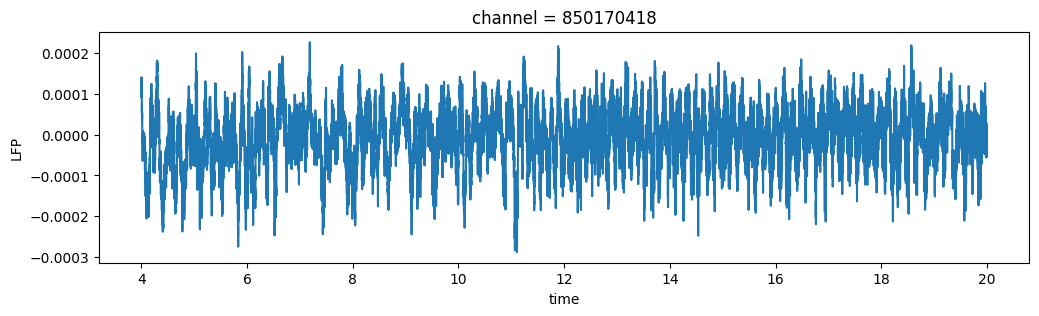

In [49]:
#Plotting the time series of a single channel
channel = lfp.channel[1]
lfp_subset = lfp.loc[dict(channel=channel, time=slice(4,20))]
plt.figure(figsize=(12,3))
lfp_subset.plot()
plt.show()

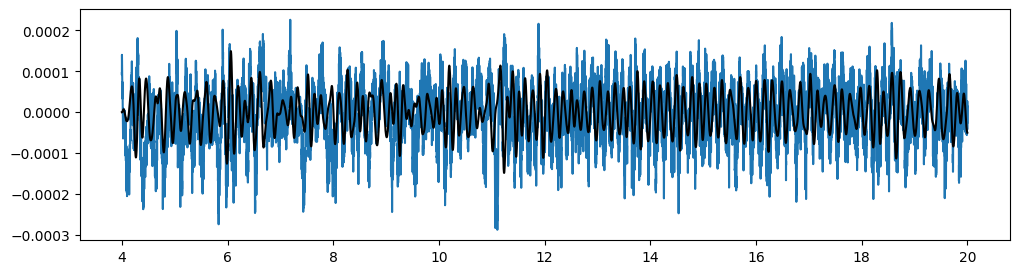

In [50]:
#Filtering the signal
t = lfp_subset.time.values
v = lfp_subset.values
import scipy.signal
freq_window = (4, 10)
filt_order = 3
fs = 1/(t[1]-t[0]) # sampling rate
b, a = scipy.signal.butter(filt_order, freq_window, btype='bandpass', fs=fs)
v_alpha = scipy.signal.lfilter(b, a, v)


plt.figure(figsize=(12,3))
plt.plot(t, v)
plt.plot(t, v_alpha,'k')

In [51]:
f, psd = scipy.signal.welch(v, fs, nperseg=1000)
f_peak = f[np.argmax(psd)]
print(f"peak frequency: {f_peak} Hz")

peak frequency: 6.249993046508148 Hz


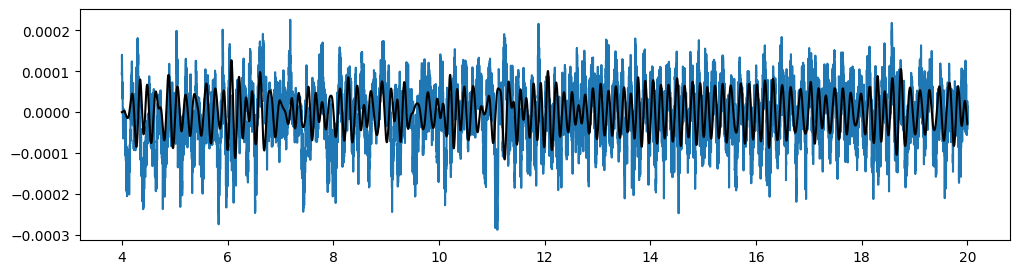

In [52]:
freq_window = (f_peak-2, f_peak+2)
filt_order = 3
b, a = scipy.signal.butter(filt_order, freq_window, btype='bandpass', fs=fs)
v_filtered = scipy.signal.lfilter(b, a, v)
plt.figure(figsize=(12,3))
plt.plot(t, v)
plt.plot(t, v_filtered,'k')

Text(0, 0.5, 'Voltage (uV)')

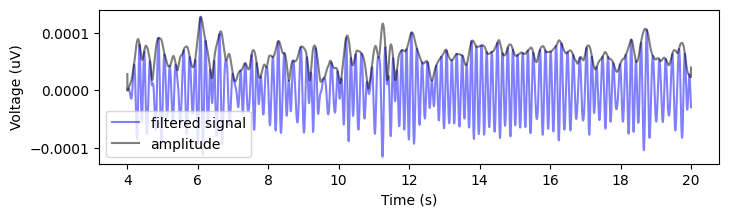

In [53]:
lfp_z = scipy.signal.hilbert(v_filtered)
lfp_amp = np.abs(lfp_z)
lfp_phase = np.angle(lfp_z)
plt.figure(figsize=(8,2))
plt.plot(t, v_filtered,'b',label='filtered signal',alpha=.5)
plt.plot(t, lfp_amp,'k',label='amplitude',alpha=.5)
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

Text(0, 0.5, 'Phase (rad)')

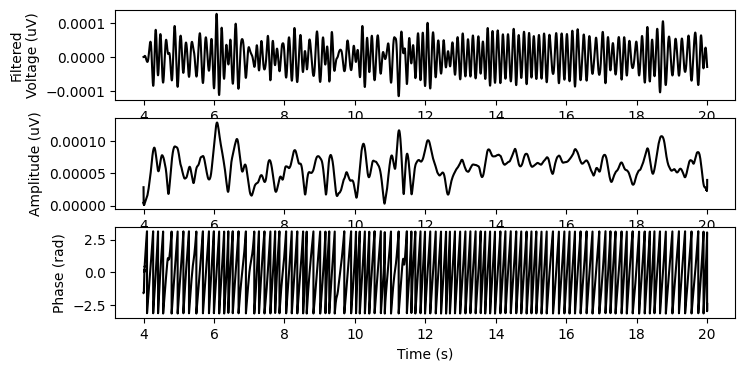

In [54]:
plt.figure(figsize=(8,4))
plt.subplot(3,1,1)
plt.plot(t, v_filtered,'k')
plt.ylabel('Filtered\nVoltage (uV)')
plt.subplot(3,1,2)
plt.plot(t, lfp_amp,'k')
plt.ylabel('Amplitude (uV)')
plt.subplot(3,1,3)
plt.plot(t, lfp_phase,'k')
plt.xlabel('Time (s)')
plt.ylabel('Phase (rad)')

In [66]:
f, t_spec, spec = scipy.signal.spectrogram(v, fs=fs, window='hamming',
                            nperseg=1000, noverlap=1000-1, mode='psd')
# Scipy assumes our signal starts at time=0, so we need to provide the offset
t_spec = t_spec + t[0]

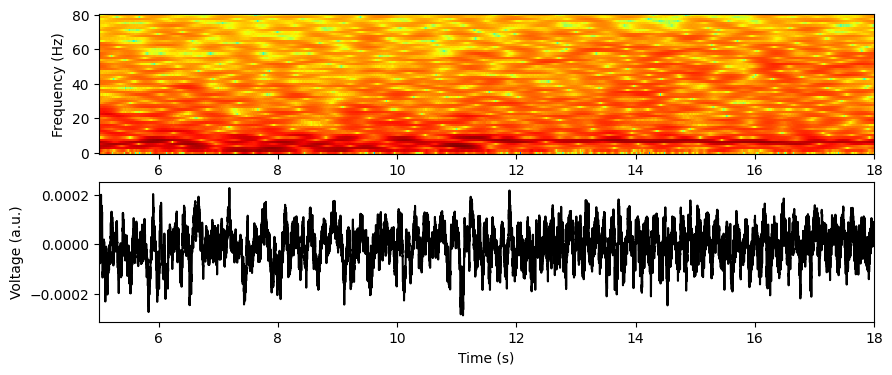

In [67]:
fmax = 80
x, y = t_spec, f[f<fmax]
plot_data = np.log10(spec[f<fmax])
from matplotlib import cm
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.pcolormesh(x, y, plot_data, cmap=cm.jet)
window = [5,18]
plt.xlim(window)
plt.ylabel('Frequency (Hz)')

plt.subplot(2,1,2)
plt.plot(t, v, 'k')
plt.xlim(window)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (a.u.)')
plt.show()